Build a Model which predict sales based on money spent on different
platforms for marketing

In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')
#Import the numpy and pandas package
import numpy as np
import pandas as pd

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.DataFrame(pd.read_csv('advertising.csv'))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Data Inspection

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data cleaning

In [8]:
#Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
#There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

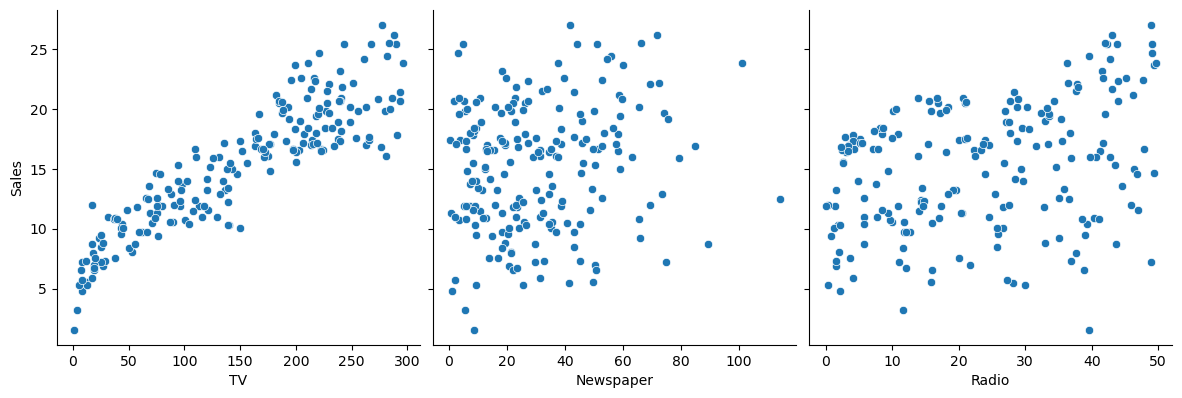

In [9]:
#Let's see how Sales are related with other variables using scatter plot
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

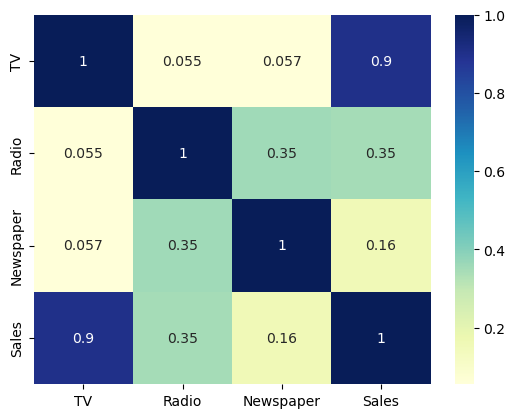

In [10]:
#Let's see the correlation between different variables
sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales.
So let's go ahead and perform simple linear regression using TV as our feature variable.

In [11]:
x=advertising['TV']
y=advertising['Sales']

Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3)

In [13]:
x_train.head()

49      66.9
145    140.3
110    225.8
171    164.5
52     216.4
Name: TV, dtype: float64

In [14]:
y_train.head()

49      9.7
145    10.3
110    18.4
171    17.5
52     22.6
Name: Sales, dtype: float64

Building a Linear Model

In [15]:
import statsmodels.api as sm

In [16]:
#Add a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

#Fit the regression line using OLS
lr=sm.OLS(y_train,x_train_sm).fit()

In [17]:
#Print the parameters
lr.params

const    7.020090
TV       0.054434
dtype: float64

In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     547.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           7.07e-50
Time:                        02:45:53   Log-Likelihood:                -311.77
No. Observations:                 140   AIC:                             627.5
Df Residuals:                     138   BIC:                             633.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0201      0.387     18.154      0.0

From the parameters we get our linear regression equation as:
    Sales=7.020 + 0.054*TV

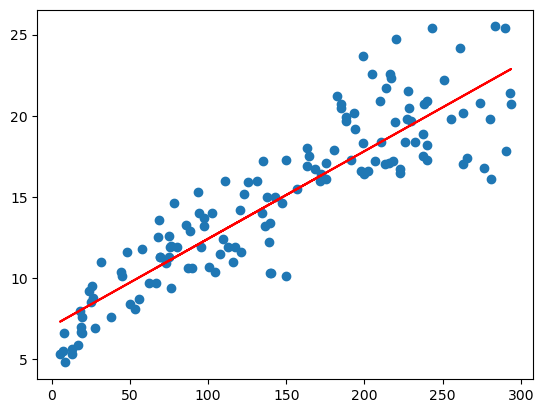

In [21]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.020 + 0.054*x_train,'r')
plt.show()

# Predictions on the test set

Now that we have fitted a regression line on our training dataset, it's time to make predictions
on the test data. 

In [22]:
#Add a constant to x_test
x_test_sm=sm.add_constant(x_test)

#Predict the y values corresponding to x_test_sm
y_pred = lr.predict(x_test_sm)

In [23]:
y_pred.head()

10     10.618204
91      8.576914
37     11.086339
75      7.940032
193    16.099747
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
#root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

2.3901256973848963

Checking the R-squared on the test set

In [26]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.8310409878798357

Visualizing the fit on the test set

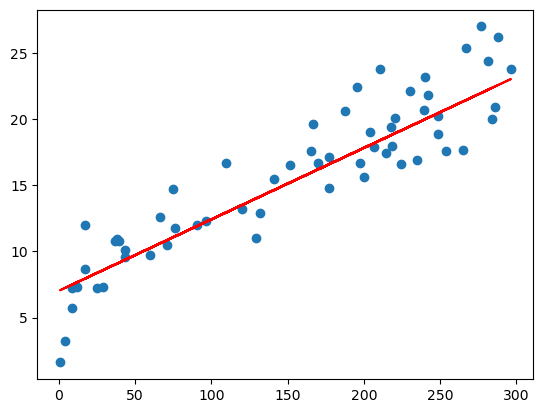

In [27]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.020 + 0.054*x_test,'r')
plt.show()

Thank You